In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [223]:
df = pd.read_csv("insurace_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [224]:
df.shape

(27, 2)

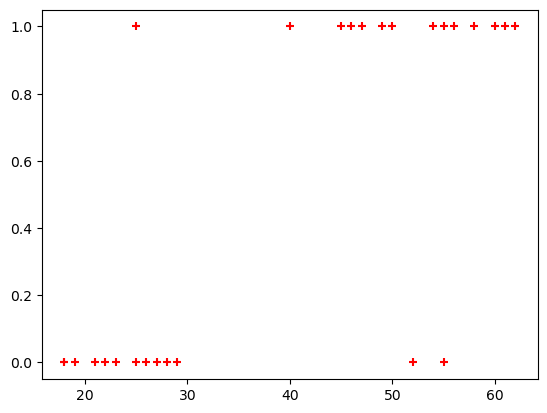

In [225]:
plt.scatter(df.age, df.bought_insurance, marker='+', color='red')

In [226]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['age']], df.bought_insurance, test_size=0.2)
X_test

,age
26,23
6,55
0,22
15,55
16,25
4,46


In [227]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [228]:
y_predicted = model.predict(X_test)
y_predicted

array([0, 1, 0, 1, 0, 1], dtype=int64)

In [229]:
model.predict_proba(X_test)

array([[0.97505668, 0.02494332],
       [0.03679762, 0.96320238],
       [0.979816  , 0.020184  ],
       [0.03679762, 0.96320238],
       [0.96204718, 0.03795282],
       [0.21155705, 0.78844295]])

In [230]:
model.coef_

array([[0.216585]])

In [231]:
model.intercept_

array([-8.64734455])

In [232]:
import math


def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [233]:
def prediction_function(age):
    z = 0.1139 * age - 4.4029   # y = mx + c, m=model.coef_, c=model.intercept_
    return sigmoid(z)

In [234]:
age = 35
prediction_function(age)

0.39737851862873036

In [235]:
age = 43
prediction_function(age)

0.6212365359918156

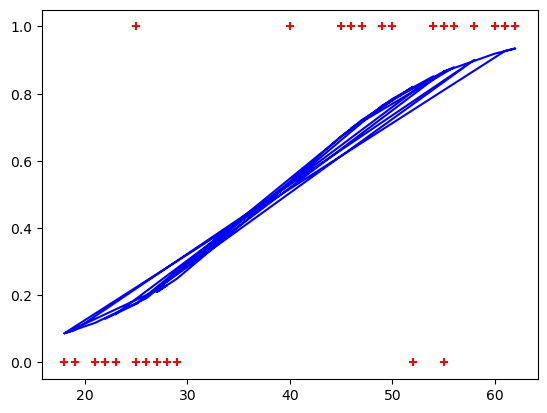

In [236]:
# plot a line using prediction function take age from df
x = np.array(df.age).reshape(-1, 1)
y = np.array(df.bought_insurance)
plt.scatter(x, y, marker='+', color='red')
plt.plot(x, prediction_function(x), color='blue')
plt.show()

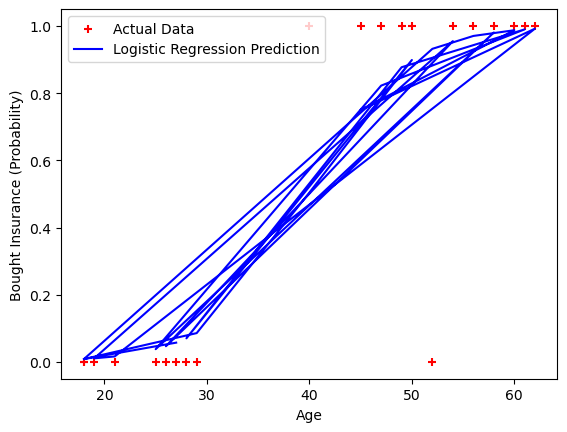

In [237]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Reshaping for the Logistic Regression model
x = X_train.values.reshape(-1, 1)
y = y_train

# Create and fit the Logistic Regression model
model = LogisticRegression()
model.fit(x, y)

# Plot the actual data points
plt.scatter(x, y, marker='+', color='red', label='Actual Data')

# Generate predictions
# x_test = X_test.values.reshape(-1, 1)
# y_pred = model.predict_proba(x_test)[:, 1]

x_test = x
y_pred = model.predict_proba(x_test)[:, 1]

# Plot the prediction curve
plt.plot(x_test, y_pred, color='blue', label='Logistic Regression Prediction')

# Add labels and legend
plt.xlabel('Age')
plt.ylabel('Bought Insurance (Probability)')
plt.legend()

# Show the plot
plt.show()

In [238]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

linear_model.fit(x, y)

# Plot the actual data points

LinearRegression()

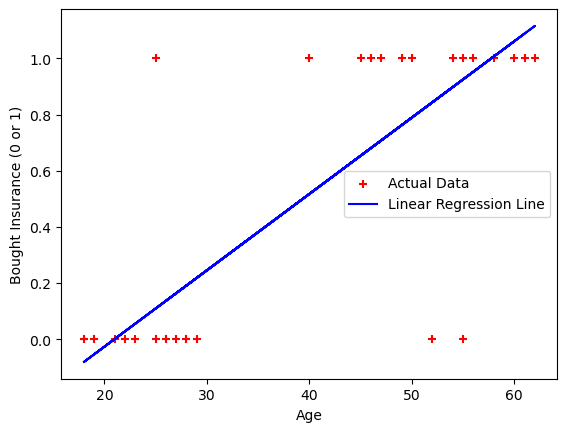

In [239]:
plt.scatter(df[['age']], df.bought_insurance, marker='+', color='red', label='Actual Data')

# Generate predictions for the linear model
y_linear_pred = linear_model.predict(x)

# Plot the linear regression line
plt.plot(x, y_linear_pred, color='blue', label='Linear Regression Line')

# Add labels and legend
plt.xlabel('Age')
plt.ylabel('Bought Insurance (0 or 1)')
plt.legend()

# Show the plot
plt.show()